In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [0]:
import os


In [12]:
!wget https://zenodo.org/record/53169/files/Kather_texture_2016_image_tiles_5000.zip?download=1

--2019-11-11 12:09:27--  https://zenodo.org/record/53169/files/Kather_texture_2016_image_tiles_5000.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.184.65.20
Connecting to zenodo.org (zenodo.org)|188.184.65.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 258098431 (246M) [application/octet-stream]
Saving to: ‘Kather_texture_2016_image_tiles_5000.zip?download=1’

Kather_texture_2016 100%[===================>] 246.14M  1.77MB/s    in 4m 58s  

2019-11-11 12:14:26 (845 KB/s) - ‘Kather_texture_2016_image_tiles_5000.zip?download=1’ saved [258098431/258098431]



In [0]:
!mv 'Kather_texture_2016_image_tiles_5000.zip?download=1' 'Kather.zip'
!unzip 'Kather.zip'


In [16]:
os.chdir('/content/')
os.listdir()

['.config',
 'Kather.zip',
 'Kather_texture_2016_image_tiles_5000',
 'sample_data']

In [17]:
path = Path('./Kather_texture_2016_image_tiles_5000/') 
path.ls()

[PosixPath('Kather_texture_2016_image_tiles_5000/03_COMPLEX'),
 PosixPath('Kather_texture_2016_image_tiles_5000/05_DEBRIS'),
 PosixPath('Kather_texture_2016_image_tiles_5000/06_MUCOSA'),
 PosixPath('Kather_texture_2016_image_tiles_5000/08_EMPTY'),
 PosixPath('Kather_texture_2016_image_tiles_5000/02_STROMA'),
 PosixPath('Kather_texture_2016_image_tiles_5000/01_TUMOR'),
 PosixPath('Kather_texture_2016_image_tiles_5000/04_LYMPHO'),
 PosixPath('Kather_texture_2016_image_tiles_5000/07_ADIPOSE')]

In [0]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [20]:
data.classes

['01_TUMOR',
 '02_STROMA',
 '03_COMPLEX',
 '04_LYMPHO',
 '05_DEBRIS',
 '06_MUCOSA',
 '07_ADIPOSE',
 '08_EMPTY']

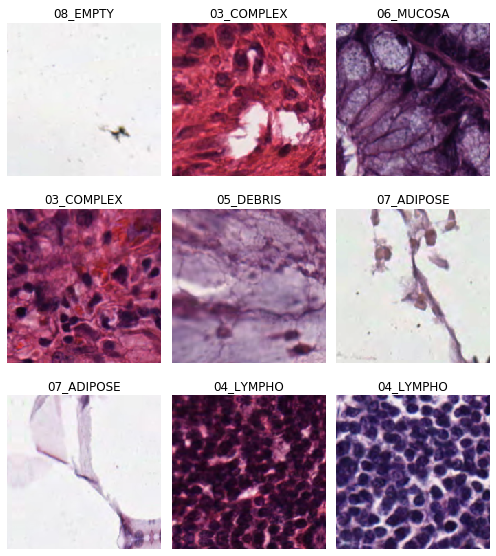

In [21]:
data.show_batch(rows=3, figsize=(7,8))

In [22]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['01_TUMOR',
  '02_STROMA',
  '03_COMPLEX',
  '04_LYMPHO',
  '05_DEBRIS',
  '06_MUCOSA',
  '07_ADIPOSE',
  '08_EMPTY'],
 8,
 4000,
 1000)

In [23]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 55.4MB/s]


In [24]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.032561,0.377675,0.121000,00:26
1,0.619663,0.272486,0.104000,00:26
2,0.449038,0.246155,0.086000,00:26
3,0.352748,0.233588,0.085000,00:26


In [0]:
learn.save('stage-1')
learn.load('stage-1')

In [0]:
learn.unfreeze()

In [27]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


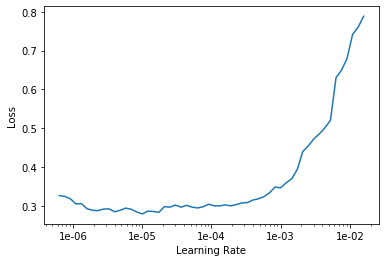

In [28]:
learn.recorder.plot()

In [29]:
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.326936,0.221679,0.087000,00:26
1,0.282640,0.201091,0.076000,00:26
2,0.262884,0.198714,0.078000,00:26
3,0.250261,0.192994,0.074000,00:26


In [0]:
learn.save('stage-2')
learn.load('stage-2')

In [32]:
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.236562,0.184227,0.068000,00:26
1,0.227483,0.175792,0.068000,00:26
2,0.210065,0.168620,0.065000,00:26
3,0.204974,0.166524,0.065000,00:27


In [0]:
learn.save('stage-3')
learn.load('stage-3')

In [34]:
learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.204839,0.167240,0.062000,00:26
1,0.199046,0.162308,0.057000,00:26
2,0.181842,0.156831,0.057000,00:26
3,0.182386,0.155250,0.059000,00:26
4,0.164811,0.149476,0.057000,00:26
5,0.165227,0.146704,0.060000,00:26
6,0.153972,0.146137,0.059000,00:26
7,0.143970,0.145522,0.058000,00:26
8,0.141827,0.140735,0.054000,00:26
9,0.142541,0.145434,0.057000,00:26


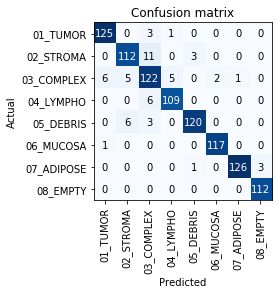

In [35]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()